___
# <center> XGBoost Regression
<center> XGBoost was designed to be used with large complex datasets
$$$$ 
<center> Gareth Bayvel
    
___

___
## <center> Building XGBoost Forest
___
    
**Step One**:
    
1. XGBoost starts by making an initial prediction (single leaf) which by default is usually 0.5.
    
    
2. Whether we use XGBoost for Classification or Regression our initial prediction is 0.5.
    
    
3. This Initializes our Model with a constant value (Initial Leaf).

**Step Two**:    
    
1. Calculate the residuals (pseudo-residuals) between our actual observations and our predicted value (initial prediction).
  
    
2. Fit a regression tree to the residuals (pseudo-residuals) for each Tree we construct.
  
    
3. XGBoost uses unique regression trees by calculating the similarity score at each node and splitting based upon largest gain. 
    
    
4. Prune the tree based upn a gamma value as a threshold
    
    
5. Calculate the output values of each leaf.
 
    
4. Make a New Prediction for each sample and Update residuals accordingly

**Step Three**:
1. Repeat the above steps.
    
    
2. Our second tree is built based on the residual errors of the first tree.

___
# <center> XGBoost Unique Tree algorithm for calculating Similarity Score
       
___
___

#### <center> To solve any supervised Machine Learning problem, given the dataset:
    
$$\{(x_i,y_i\}_{i=1}^{n}$$

#### <center> And a Differential Loss Function:
$$L(y,f)$$

___ 
#### <center> We are trying to find the optimal output value for the leaf than minimize our differentiable loss function:


$$[\sum_{i=1}^{n}L(y_i,p_i)] + \frac{1}{2}\lambda O^2_{\text{value}}$$
   

___
## <center> Intuition

___
#### <center> Covid-19 Efficacy DataSet: $\{(x_i,y_i\}_{i=1}^{n}$
$$\begin{array}{c|c}
   \text{Dosage} & \text{Efficacy}\\
  \hline
  8  & -10 \\ 
  \hline
   18 & 6 \\  
  \hline
  22 & 8 \\
  \hline
  32 & -7 
 \end{array}$$  
#### <center> The negative efficacy values indicate that the phizer vaccine did more harm than good. 

___
## <center> Initial Prediction is 0.5

<center> When we use Gradient Boosting for Classification or Regression the initial Prediction by default is 0.5
    
___

$$\begin{array}{c|c}
   \text{Dosage} & \text{Efficacy} & \text{Prediction} \\
  \hline
  8  & -10 & 0.5\\ 
  \hline
   18 & 6 & 0.5\\  
  \hline
  22 & 8 & 0.5\\
  \hline
  32 & -7 & 0.5
 \end{array}$$  

___
## <center> Initial Prediction Accuracy Through Pseudo-Residuals
<center> We can measure how bad our initial Prediction is by calculating the pseudo-residuals, the difference between the observed and predicted.

___
$$\text{Residuals} = (\text{Observed - Predicted})$$
___

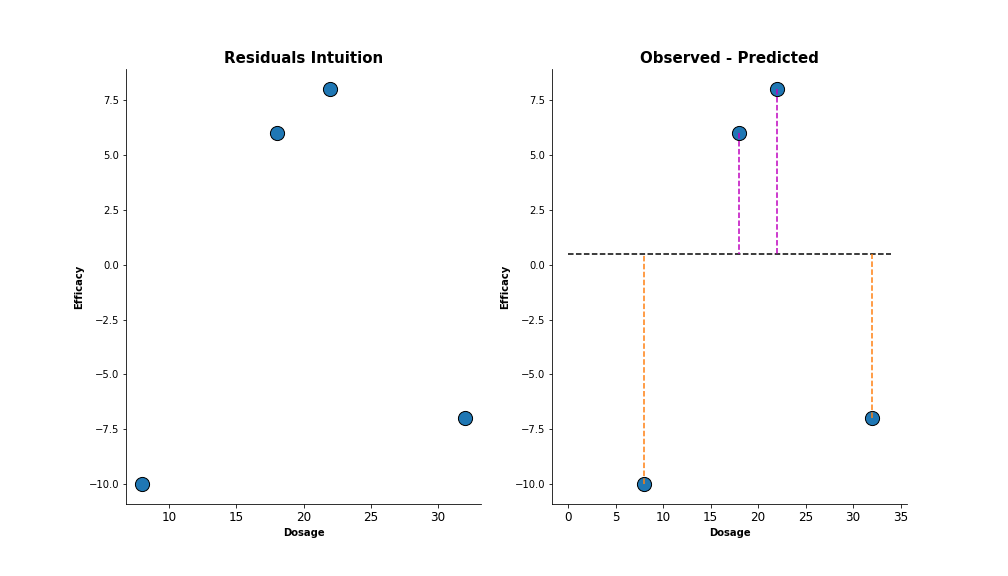

In [74]:
Image('XGBoostInitial.png')

___
### <center> Residuals for the leaf's Initial Prediction
___

#### <center> Covid-19 Efficacy DataSet
$$\begin{array}{c|c}
   \text{Dosage} & \text{Efficacy} & \text{Prediction} & \text{Residuals}\\
  \hline
  8  & -10 & 0.5 & -10.5\\ 
  \hline
   18 & 6 & 0.5 & 5.5\\  
  \hline
  22 & 8 & 0.5 & 7.5\\
  \hline
  32 & -7 & 0.5 & -7.5
 \end{array}$$  


___
#### <center> We are trying to find the optimal output value for the leaf than minimize our differentiable loss function:


$$[\sum_{i=1}^{n}L(y_i,p_i)] + \frac{1}{2}\lambda O^2_{\text{value}}$$
___
    
## <center> Taylor Series Approximation

<center> Taylor series are extremely powerful tools for approximating functions that can be difficult to otherwise compute. 
    
___    
#### <center> Finding polynomials that approximate a function   
<center> A Taylor series approximation uses Taylor series to represent a number as a polynomial that very closely approximates the value of a specified $x$ value. Taking non-polynomial functions and finding polynomials that approximate them near some $x$ value.
    
___    
#### <center> Why Use Polynomials    
<center> Polynomials tend to be easier to deal with than others functions as they are easier to compute and take derivatives

___
#### <center> Easiest Illustration is $e^x$ around the value $x=0$

$$\frac{d}{dx} = e^x$$

___
#### <center> At Point x is zero
    
$$e^0 = 1$$
___
    
#### <center> Polynomial Approximation of $e^x$ 

$$f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots $$
___
$$f(x) = 1 + 1\frac{x}{1!}+ 1\frac{x^2}{2!} + 1\frac{x^3}{3!}+ \cdots $$

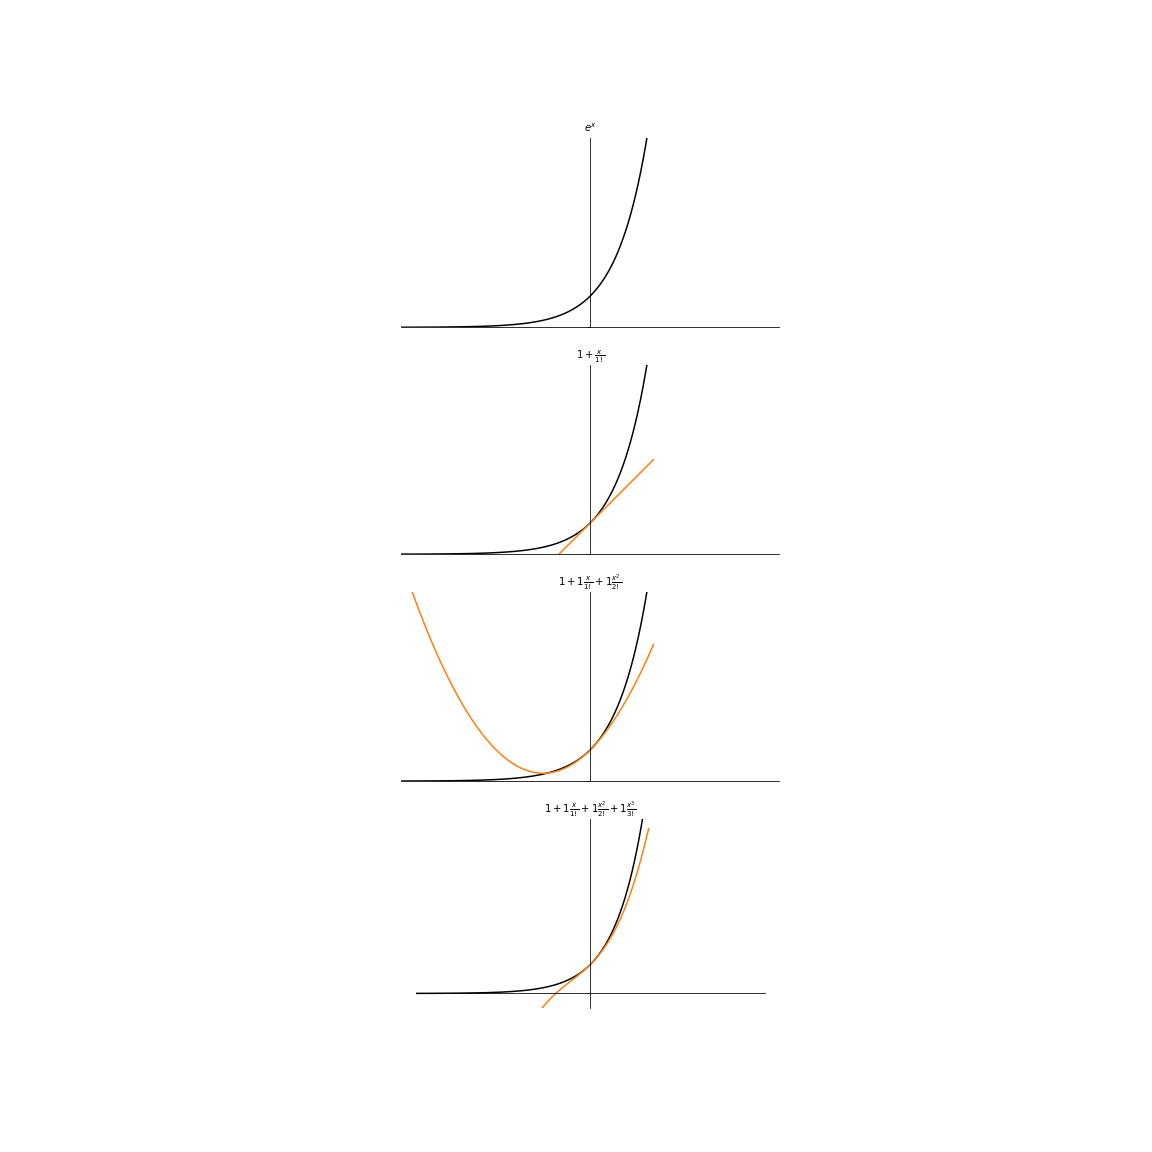

In [76]:
Image('TaylorPoly.png')

___
#### <center> Second Order Taylor Approximation to solve for Optimal Output Value    
    
$$L(y_i,p_i+O_{\text{value}}) \approx L(y_i,p_i) + [\frac{d}{dp_i}L(y_i,p_i)]O_{\text{value}} + \frac{1}{2}[\frac{d^2}{d^2p_i}L(y_i,p_i)]O_{\text{value}}^2$$ 
    
$$g = [\frac{d}{dp_i}L(y_i,p_i)]$$
    
 
$$h = [\frac{d^2}{d^2p_i}L(y_i,p_i)]$$
___    
$$L(y_i,p_i+O_{\text{value}}) \approx L(y_i,p_i) +gO_{\text{value}} + \frac{1}{2}hO_{\text{value}}^2$$ 
  
___
#### <center> Ouptut Value that minimizes the Loss Function plus Regularization
$$ L(y_1,p_1^0) +g_1O_{\text{value}} + \frac{1}{2}h_1O_{\text{value}}^2 \nonumber \\ \qquad {}  + L(y_2,p_2^0) +g_2O_{\text{value}} + \frac{1}{2}h_2O_{\text{value}}^2\nonumber + \cdots +\nonumber \\ \qquad {} + L(y_n,p_n^0) +g_nO_{\text{value}} + \frac{1}{2}h_nO_{\text{value}}^2 + \frac{1}{2}\lambda O^2_{\text{value}}$$ 
    
___
#### <center> Terms associated with $O_{\text{value}}$
    
$$ g_1O_{\text{value}} + \frac{1}{2}h_1O_{\text{value}}^2 \nonumber \\ \qquad {}  + g_2O_{\text{value}} + \frac{1}{2}h_2O_{\text{value}}^2\nonumber + \cdots +\nonumber \\ \qquad {} +g_nO_{\text{value}} + \frac{1}{2}h_nO_{\text{value}}^2 + \frac{1}{2}\lambda O^2_{\text{value}}$$ 
 
___
#### <center> Combine Like Terms 
$$(g_1 + g_2 +\cdots + g_n)O_{\text{value}} + \frac{1}{2}(h_1 + h_2 +\cdots + h_n + \lambda)O^2_{\text{value}}$$
    
___   
#### <center> Taking Derivative with respect to $O_{\text{value}}$
    
$$\frac{d}{dO_{\text{value}}} = (g_1 + g_2 +\cdots + g_n)+(h_1 + h_2 +\cdots + h_n + \lambda)O_{\text{value}} = 0$$
    
___   
#### <center>Solve for $O_{\text{value}}$
    
$$(g_1 + g_2 +\cdots + g_n)+(h_1 + h_2 +\cdots + h_n + \lambda)O_{\text{value}}$$
$$$$ 
$$(h_1 + h_2 +\cdots + h_n + \lambda)O_{\text{value}} = -(g_1 + g_2 +\cdots + g_n)$$
    
___    
$$O_{\text{value}} = \frac{-(g_1 + g_2 +\cdots + g_n)}{(h_1 + h_2 +\cdots + h_n + \lambda)}$$ 
    
___    
#### <center> Similarity Score
$$-(g_1 + g_2 +\cdots + g_n)O_{\text{value}} - \frac{1}{2}(h_1 + h_2 +\cdots + h_n + \lambda)O^2_{\text{value}}$$
$$$$    
    
$$-(g_1 + g_2 +\cdots + g_n)\frac{-(g_1 + g_2 +\cdots + g_n)}{(h_1 + h_2 +\cdots + h_n + \lambda)} - \frac{1}{2}(h_1 + h_2 +\cdots + h_n + \lambda)[\frac{-(g_1 + g_2 +\cdots + g_n)}{(h_1 + h_2 +\cdots + h_n + \lambda)}]^2$$
    
$$$$    
$$\frac{(g_1 + g_2 +\cdots + g_n)^2}{(h_1 + h_2 +\cdots + h_n + \lambda)} - \frac{1}{2}\frac{(g_1 + g_2 +\cdots + g_n)^2}{(h_1 + h_2 +\cdots + h_n + \lambda)}$$   
    
___  
$$\text{Similarity Score} = \frac{(g_1 + g_2 +\cdots + g_n)^2}{(h_1 + h_2 +\cdots + h_n + \lambda)}$$

___    
#### <center> The Sum of Squared Residuals is most commonly used as the Loss Function for XGBoost because its Partial Derivative is so neat to work with.
    
$$L(y_i,p_i) = \frac{1}{2}(y_i-p_i)^2$$  
___
#### <center> Partial Derivative w.r.t Predicted 
    
$$\text{Chain and Power Rule}  = 2.\frac{1}{2}(y_i-p_i)^{2-1}\times -1$$
    
$$\frac{\partial}{\partial p_i} = -(y_i-p_i)$$
    
$$g_i = -(y_i-p_i)$$    
___    
    
$$\frac{d''}{d''p_i} = \frac{d}{dp_i}-(y_i-p_i) = 1$$    
    
    
$$h_i = 1$$   
___    
#### <center>Solve for $O_{\text{value}}$
  
$$O_{\text{value}} = \frac{-(-(y_i-p_i) + -(y_i-p_i) +\cdots + -(y_i-p_i))}{(1 + 1 +\cdots + 1 + \lambda)}$$  
    
___
$$\text{Similary Score For Residuals} = \frac{(\text{Sum of Residuals})^2}{\text{Number of Residuals}+\lambda}$$
    $$$$
$$\text{Regularization Parameter} =\lambda$$

___
#### <center> B. Fit a regression tree to the Residual values
We will build our tree using our Dosage to predict the **residuals**. 
    
1. XGBoost uses unique regression trees by calculating the similarity score at each node and splitting based upon largest gain.
    
    
2. For illustration purposes we will restrict our max_depth to 2
    
___
#### <center> All residuals in intial leaf
    
$$\begin{bmatrix}
      -10.5 & 5.5 & 7.5 & -7.5
     \end{bmatrix}$$
    
___    
#### <center> Calculate Similary Score for Residuals
    
$$\text{Similary Score For Residuals} = \frac{(\text{Sum of Residuals})^2}{\text{Number of Residuals}+\lambda}$$
    $$$$
$$\text{Regularization Parameter} =\lambda$$
    
___
#### <center> Setting our Regularization Parameter to zero
$$\text{Similary Score For Residuals} = \frac{(-10.5 + 5.5 + 7.5 + -7.5)^2}{4+0}$$       
$$$$
$$\text{Similary Score For Residuals} = \frac{(-5)^2}{4+0} = 6.25$$    
    
___
### <center> Clustering similar residuals into two groups

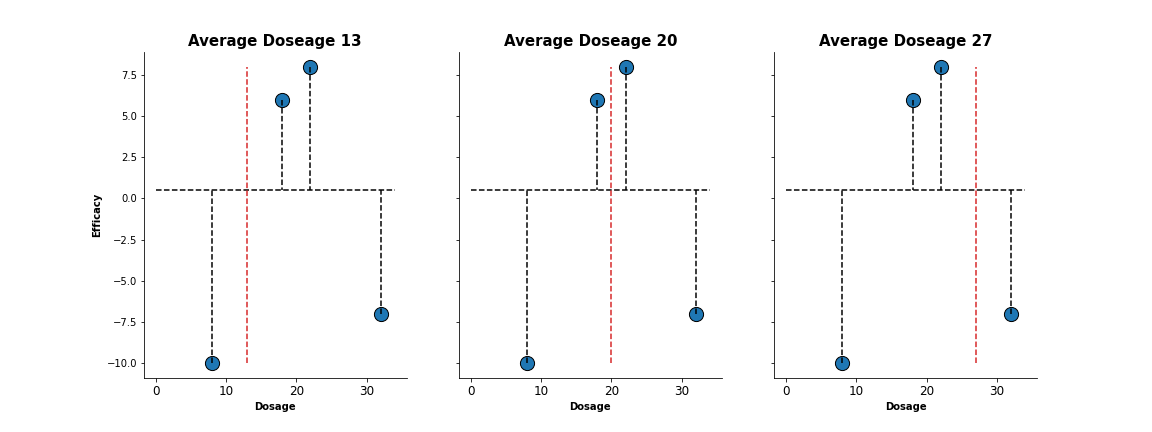

In [63]:
Image('XGBoostSimilarity.png')

___
## <center> How do we quantify the performance of clustering similar residuals compared to the Root

$$\text{Gain} = \text{Left}_\text{similarity} + \text{Right}_\text{similarity} - \text{Root}_\text{similarity}$$

___
## <center> Average Dosage 13
___
#### <center> Average Dosage $\leq$ 13
    
$$\begin{bmatrix}
      -10.5 
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 13$} = \frac{(-10.5)^2}{1+0} = 110.25$$       
___
#### <center> Average Dosage $\geq$ 13
$$\begin{bmatrix}
    5.5 & 7.5 & -7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 13$} = \frac{(5.5 + 7.5 + -7.5)^2}{3+0} = 10.08$$     
___  
#### <center> Gain For Average Dosage 13
$$\text{Gain} = 110.25 + 10.8 - 6.25$$
    
$$\text{Gain} = 114.8$$
___
## <center> Average Dosage 20
___
___
#### <center> Average Dosage $\leq$ 20
    
$$\begin{bmatrix}
      -10.5 & 5.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 20$} = \frac{(-10.5 + 5.5)^2}{2+0} = 12.5$$       
___
#### <center> Average Dosage $\geq$ 20
$$\begin{bmatrix}
    7.5 & -7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 20$} = \frac{(7.5 + -7.5)^2}{2+0} = 0$$     
___  
#### <center> Gain For Average Dosage 20
$$\text{Gain} = 12.5 + 0 - 6.25$$
    
$$\text{Gain} = 6.25$$
    
___
## <center> Average Dosage 27
___
#### <center> Average Dosage $\leq$ 27
    
$$\begin{bmatrix}
      -10.5 & 5.5 & 7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 27$} = \frac{(-10.5 + 5.5 + 7.5)^2}{3+0} = 2.083$$       
___
#### <center> Average Dosage $\geq$ 27
$$\begin{bmatrix}
    -7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 27$} = \frac{(-7.5)^2}{1+0} = 56.25$$     
___  
#### <center> Gain For Average Dosage 27
$$\text{Gain} = 2.083 + 56.25 - 6.25$$
    
$$\text{Gain} = 52.083$$
    
___
### <center> Largest Gain Is Dosage $\leq 13$
$$\begin{array}{c|c}
   \text{Dosage} & \text{Gain}\\
  \hline
  \leq 13  & 114.8\\ 
  \hline
  \leq 20 & 6.25 \\  
  \hline
  \leq 27 & 52.08 
 \end{array}$$  
    
#### <center> Dosage $\leq 13$ is our first branch in our tree

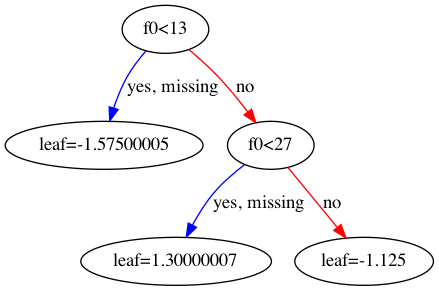

In [102]:
Image('XGBoostTreeDiagram.png')

___
## <center> Creating Internal Nodes by Clustering similar residuals into internal nodes
___

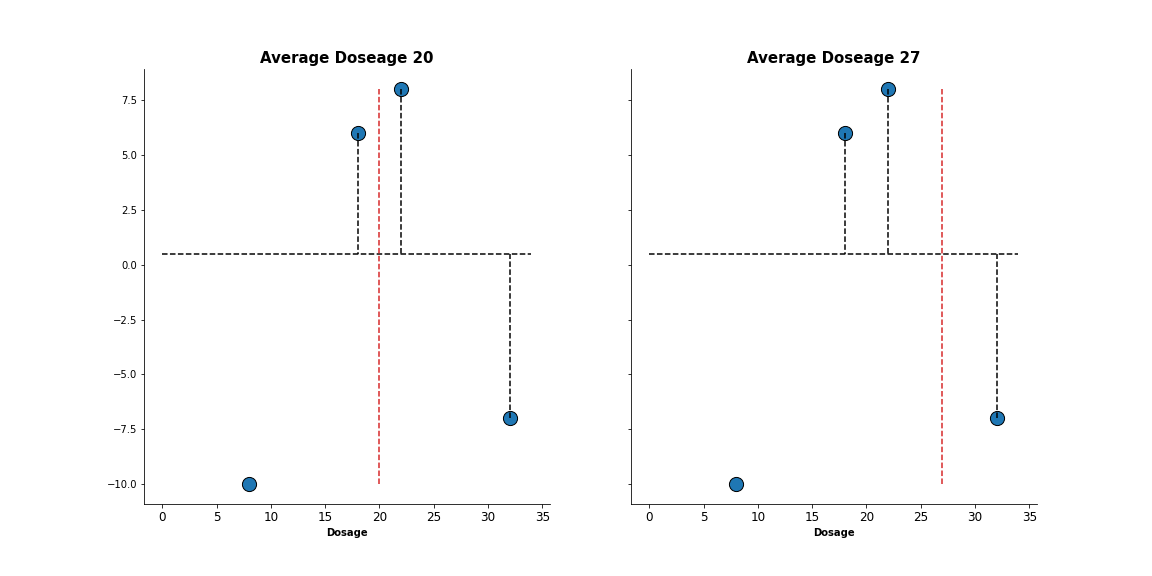

In [78]:
Image('XGBoostSimilarity2.png')

## <center> Average Dosage 20
___
___
#### <center> Average Dosage $\leq$ 20
    
$$\begin{bmatrix}
      5.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 20$} = \frac{(5.5)^2}{1+0} = 30.25$$       
___
#### <center> Average Dosage $\geq$ 20
$$\begin{bmatrix}
    7.5 & -7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 20$} = \frac{(7.5 + -7.5)^2}{2+0} = 0$$     
___  
#### <center> Gain For Average Dosage 20
$$\text{Gain} = 30.25 + 0 - 10.08$$
    
$$\text{Gain} = 20.17$$
    
___
## <center> Average Dosage 27
___
#### <center> Average Dosage $\leq$ 27
    
$$\begin{bmatrix}
      5.5 & 7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 27$} = \frac{(5.5 + 7.5)^2}{2+0} = 84.5$$       
___
#### <center> Average Dosage $\geq$ 27
$$\begin{bmatrix}
    -7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 27$} = \frac{(-7.5)^2}{1+0} = 56.25$$     
___  
#### <center> Gain For Average Dosage 27
$$\text{Gain} = 84.5 + 56.25 - 10.08$$
    
$$\text{Gain} = 130.67$$
    
___
### <center> Largest Gain Is Dosage $\leq 27$
$$\begin{array}{c|c}
   \text{Dosage} & \text{Gain}\\
  \hline
  \leq 20 & 20.17 \\  
  \hline
  \leq 27 & 130.67 
 \end{array}$$  
    
#### <center> Dosage $\leq 27$ is our internal branch in our tree

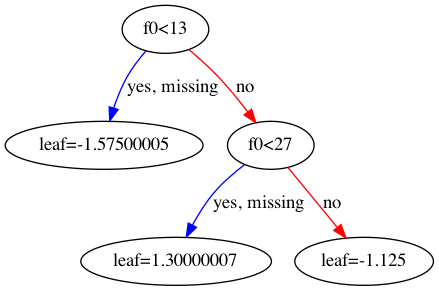

In [100]:
Image('XGBoostTreeDiagram.png')

___
## <center> Pruning XGBoost Trees
<center> XGBoost Trees are Pruned based upon its gain values


___
#### <center> We Start by selecting our Parameter $\gamma$ to act as our threshold value


$$ \text{Gain - $\gamma$} =
  \begin{cases}
    \text{Remove Branch}         & \quad \text{if } \text{negative }\\
    \text{Keep Branch}  & \quad \text{if } \text{positive }
  \end{cases}
$$
___
#### <center> Starting with our lowest branch and setting $\gamma$ to 120
    
$$ \text{Gain for Dosage $\leq 27$ our internal branch in our tree} = 130.67$$
___    
$$ \text{Gain - $\gamma$}$$
    
$$ \text{130.67 - 120} = 10.67$$
$$$$   
<center> Results in a positive number and we will not remove this branch or its root
    
___
#### <center> Starting with our lowest branch and setting $\gamma$ to 140
$$ \text{130.67 - 140} = -10.67$$
$$$$   
<center> Results in a negative number and we will remove this branch
    
___
$$ \text{Gain for our Root $\leq 13$} = 114.8$$  
    
$$ \text{114.8 - 140} = -25.2$$
    
<center> Results in a negative number and we will  remove this whole tree

___
# <center> XGBoost Tree with Regularization

<center> The value of $\lambda$ controls our regularization and is intended to reduced the predictions sensitivity to individuals observations

#### <center> All residuals in intial leaf
    
$$\begin{bmatrix}
      -10.5 & 5.5 & 7.5 & -7.5
     \end{bmatrix}$$
    
___    
#### <center> Calculate Similary Score for Residuals
    
$$\text{Similary Score For Residuals} = \frac{(\text{Sum of Residuals})^2}{\text{Number of Residuals}+\lambda}$$
    $$$$
$$\text{Regularization Parameter} =\lambda$$

$$\lambda = {\color{red}{1}}$$
    
___
#### <center> Setting our Regularization Parameter to zero
$$\text{Similary Score For Residuals} = \frac{(-10.5 + 5.5 + 7.5 + -7.5)^2}{4+{\color{red}{1}}}$$       
$$$$
$$\text{Similary Score For Residuals} = \frac{(-5)^2}{4+{\color{red}{1}}} = 5$$    


___
## <center> Average Dosage 13
___
#### <center> Average Dosage $\leq$ 13
    
$$\begin{bmatrix}
      -10.5 
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 13$} = \frac{(-10.5)^2}{1+{\color{red}{1}}} = 55.125$$       
 $$$$
<center> $\lambda$ reduced this predictions sensitivity by 50% as it is an individual observations
    
___
#### <center> Average Dosage $\geq$ 13
$$\begin{bmatrix}
    5.5 & 7.5 & -7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 13$} = \frac{(5.5 + 7.5 + -7.5)^2}{3+{\color{red}{1}}} = 7.56$$     
___  
#### <center> Gain For Average Dosage 13
$$\text{Gain} = 55.125 + 7.56 - 5$$
    
$$\text{Gain} = 57.685$$
___
## <center> Average Dosage 20
___
___
#### <center> Average Dosage $\leq$ 20
    
$$\begin{bmatrix}
      -10.5 & 5.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 20$} = \frac{(-10.5 + 5.5)^2}{2+{\color{red}{1}}} = 8.33$$       
___
#### <center> Average Dosage $\geq$ 20
$$\begin{bmatrix}
    7.5 & -7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 20$} = \frac{(7.5 + -7.5)^2}{2+{\color{red}{1}}} = 0$$     
___  
#### <center> Gain For Average Dosage 20
$$\text{Gain} = 8.33 + 0 - 5$$
    
$$\text{Gain} = 3.33$$
    
___
## <center> Average Dosage 27
___
#### <center> Average Dosage $\leq$ 27
    
$$\begin{bmatrix}
      -10.5 & 5.5 & 7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\leq 27$} = \frac{(-10.5 + 5.5 + 7.5)^2}{3+{\color{red}{1}}} = 1.562$$       
___
#### <center> Average Dosage $\geq$ 27
$$\begin{bmatrix}
    -7.5
     \end{bmatrix}$$

$$\text{Similary Score For $\geq 27$} = \frac{(-7.5)^2}{1+{\color{red}{1}}} = 28.125$$     
___  
#### <center> Gain For Average Dosage 27
$$\text{Gain} = 1.562 + 28.125 - 5$$
    
$$\text{Gain} = 24.687$$
    
___
### <center> Largest Gain Is Dosage $\leq 13$
$$\begin{array}{c|c}
   \text{Dosage} & \text{Gain}& \text{Regularized Gain}\\
  \hline
  \leq 13  & 114.8 & 57.68\\ 
  \hline
  \leq 20 & 6.25 & 3.33\\  
  \hline
  \leq 27 & 52.08 & 24.68
 \end{array}$$  
    
#### <center> Dosage $\leq 13$ is our first branch in our tree

___
## <center> Pruning Regularized XGBoost Trees
<center> When $\lambda$ $\geq$ 0 it is easier to prune leaves beacuase the values for gain are smaller 

___
# <center> Output values for each leaf 
<center> When $\lambda$ $\geq$ 0 it reduces the amount individual observations have on the overall predicton
 $$$$
<center> When $\lambda$ = 0 the output value of the leaf is just that leaves average 
    
___
$$\text{Output values} = \frac{\text{Sum of Residuals}}{\text{Number of Residuals}+\lambda}$$
___
#### <center> Top Left Leaf
$$\frac{-10.5}{1} = -10.5$$
___
#### <center> Bottom Left Leaf 
$$ \frac{5.5 + 7.5}{2} = 6.5$$
___   
#### <center> Bottom Right Leaf
$$\frac{-7.5}{1} = -7.5$$

___
# <center> Predictions

<center> XGBoost makes new predictiins by starting with the initial predictions and adding the output of the tree scaled by a learning rate

___
#### <center> Covid-19 Efficacy DataSet
$$\begin{array}{c|c}
   \text{Dosage} & \text{Efficacy} & \text{Prediction} & \text{Residuals}\\
  \hline
  8  & {\color{red}{-10}} & {\color{red}{0.5}} & {\color{red}{-10.5}}\\ 
  \hline
   18 & 6 & 0.5 & 5.5\\  
  \hline
  22 & 8 & 0.5 & 7.5\\
  \hline
  32 & -7 & 0.5 & -7.5
 \end{array}$$  
___
$$\text{eta} = 0.3$$
    
$$0.5 + (0.3 \times -10.5) = -2.65$$
___
$$\begin{array}{c|c}
   \text{Dosage} & \text{Efficacy} & \text{Initial Prediction} & \text{Initial Residuals}& \text{New Prediction} & \text{New Residuals}\\
  \hline
  8  & -10 &0.5 & -10.5 & -2.65 & -7.35\\ 
  \hline
   18 & 6 & 0.5 &5.5 & 2.45 & 3.55\\  
  \hline
  22 & 8 & 0.5 & 7.5 &2.45 & 5.55\\
  \hline
  32 & -7 &0.5 & -7.5&-1.75 & -5.25
 \end{array}$$  

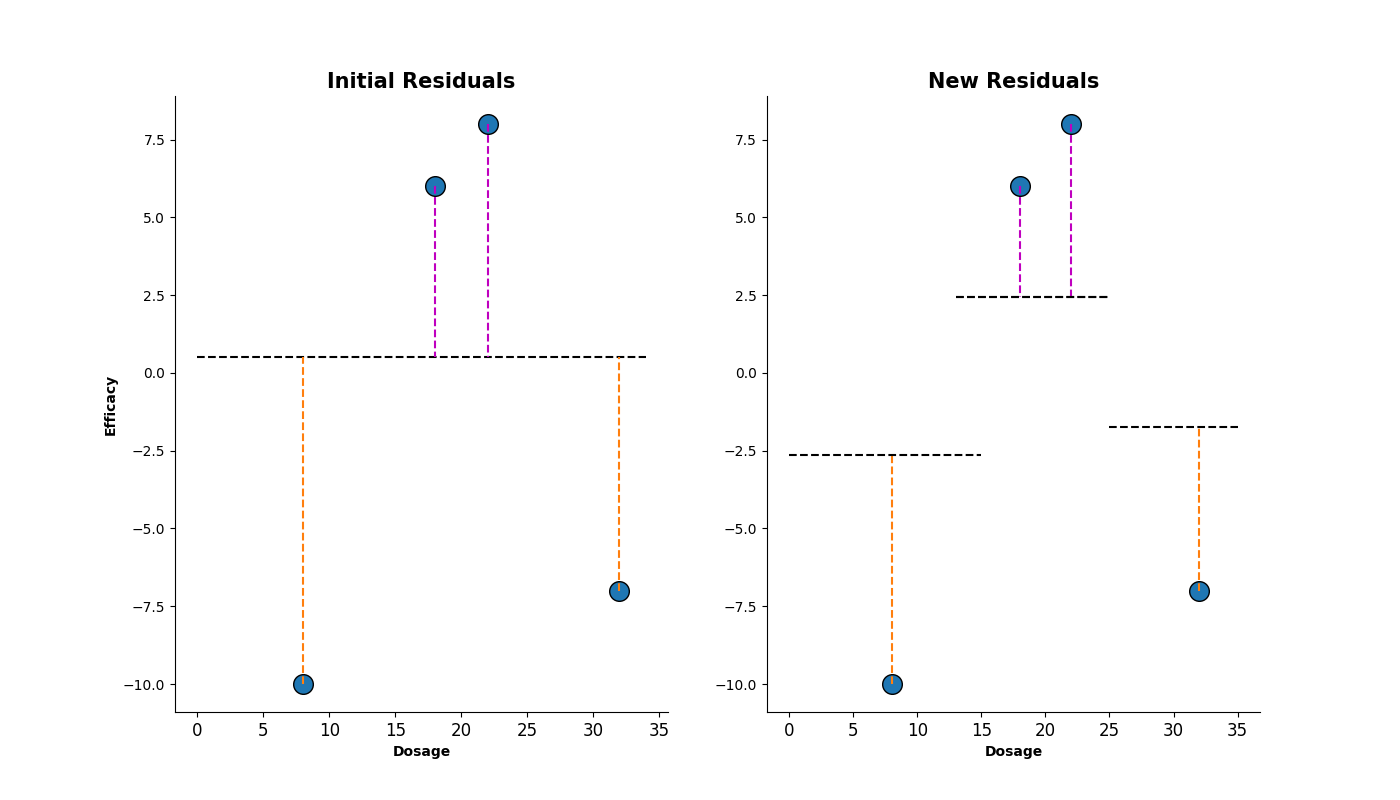

In [145]:
Image('XGBoostNewResiduals.png')

___
# <center> Build Another Tree based on New Residuals

___
# <center> Appendix

**Libraries**:
```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
import pandas as pd
import scipy
from IPython.display import display
from IPython.display import Image
from sklearn.datasets import make_regression
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
from xgboost import XGBRegressor, plot_tree
import xgboost as xgb
```
**Residuals Plot**:
```
from matplotlib.pyplot import sca
# create two classes
x1 = [8,18,22,32]
y1 = [-10,6,8,-7]


# Select length of axes and the space between tick labels


# Plot points
fig,(ax2, ax1)= plt.subplots(1,2,figsize=(14,8))

ax1.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')

ax1.plot([0,34],[0.5,0.5],'black',linestyle = '--')
#ax1.plot([5,1],[1.55,2.85],'m--')

ax1.plot([8,8],[-10,0.5],'tab:orange',linestyle = '--')
ax1.plot([18,18],[6,0.5],'m',linestyle = '--')
ax1.plot([22,22],[8,0.5],'m',linestyle = '--')
ax1.plot([32,32],[-7,0.5],'tab:orange',linestyle = '--')

#ax1.plot([0.2,0.2],[0,0.666],'m--')
#ax1.plot([0.25,0.25],[0,0.666],'m--')



# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Providing subplots with titles
ax1.set_title('Observed - Predicted',fontweight="bold", size = 15)
ax1.set_ylabel('Efficacy', fontdict=dict(weight='bold'))
ax1.set_xlabel('Dosage', fontdict=dict(weight='bold'))
ax1.xaxis.set_tick_params(labelsize = 12)

#___________________________________________

ax2.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.set_title('Residuals Intuition',fontweight="bold", size = 15)
ax2.set_ylabel('Efficacy', fontdict=dict(weight='bold'))
ax2.set_xlabel('Dosage', fontdict=dict(weight='bold'))

ax2.xaxis.set_tick_params(labelsize = 12)

fig.savefig('XGBoostInitial.png')
```
**Similarity Plot**:
```
# create two classes
x1 = [8,18,22,32]
y1 = [-10,6,8,-7]

# Plot points
fig,(ax1, ax2,ax3)= plt.subplots(1,3,figsize=(16,6),sharey='all',sharex = True)

ax1.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')

ax1.plot([0,34],[0.5,0.5],'black',linestyle = '--')

ax1.plot([8,8],[-10,0.5],'black',linestyle = '--')
ax1.plot([18,18],[6,0.5],'black',linestyle = '--')
ax1.plot([22,22],[8,0.5],'black',linestyle = '--')
ax1.plot([32,32],[-7,0.5],'black',linestyle = '--')
ax1.plot([15,15],[-10,8],'tab:red',linestyle = '--')

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Providing subplots with titles
ax1.set_title('Average Doseage 13',fontweight="bold", size = 15)
ax1.set_ylabel('Efficacy', fontdict=dict(weight='bold'))
ax1.set_xlabel('Dosage', fontdict=dict(weight='bold'))
ax1.xaxis.set_tick_params(labelsize = 12)

#___________________________________________

ax2.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')

ax2.plot([0,34],[0.5,0.5],'black',linestyle = '--')
ax2.plot([8,8],[-10,0.5],'black',linestyle = '--')
ax2.plot([18,18],[6,0.5],'black',linestyle = '--')
ax2.plot([22,22],[8,0.5],'black',linestyle = '--')
ax2.plot([32,32],[-7,0.5],'black',linestyle = '--')
ax2.plot([20,20],[-10,8],'tab:red',linestyle = '--')

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.set_title('Average Doseage 20',fontweight="bold", size = 15)
ax2.set_xlabel('Dosage', fontdict=dict(weight='bold'))
ax2.xaxis.set_tick_params(labelsize = 12)

#___________________________________________


ax3.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')

ax3.plot([0,34],[0.5,0.5],'black',linestyle = '--')

ax3.plot([8,8],[-10,0.5],'black',linestyle = '--')
ax3.plot([18,18],[6,0.5],'black',linestyle = '--')
ax3.plot([22,22],[8,0.5],'black',linestyle = '--')
ax3.plot([32,32],[-7,0.5],'black',linestyle = '--')
ax3.plot([27,27],[-10,8],'tab:red',linestyle = '--')
# Remove top and right spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Providing subplots with titles
ax3.set_title('Average Doseage 27',fontweight="bold", size = 15)
ax3.set_xlabel('Dosage', fontdict=dict(weight='bold'))
ax3.xaxis.set_tick_params(labelsize = 12)

fig.savefig('XGBoostSimilarity.png')
```
**Similarity Two**:
```
from matplotlib.pyplot import sca
# create two classes
x1 = [8,18,22,32]
y1 = [-10,6,8,-7]

# Plot points
fig,(ax2, ax3)= plt.subplots(1,2,figsize=(16,6),sharey='all',sharex = True)


ax2.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')

ax2.plot([0,34],[0.5,0.5],'black',linestyle = '--')
ax2.plot([18,18],[6,0.5],'black',linestyle = '--')
ax2.plot([22,22],[8,0.5],'black',linestyle = '--')
ax2.plot([32,32],[-7,0.5],'black',linestyle = '--')
ax2.plot([20,20],[-10,8],'tab:red',linestyle = '--')

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.set_title('Average Doseage 20',fontweight="bold", size = 15)
ax2.set_xlabel('Dosage', fontdict=dict(weight='bold'))
ax2.xaxis.set_tick_params(labelsize = 12)

#___________________________________________


ax3.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')

ax3.plot([0,34],[0.5,0.5],'black',linestyle = '--')

ax3.plot([18,18],[6,0.5],'black',linestyle = '--')
ax3.plot([22,22],[8,0.5],'black',linestyle = '--')
ax3.plot([32,32],[-7,0.5],'black',linestyle = '--')
ax3.plot([27,27],[-10,8],'tab:red',linestyle = '--')
# Remove top and right spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Providing subplots with titles
ax3.set_title('Average Doseage 27',fontweight="bold", size = 15)
ax3.set_xlabel('Dosage', fontdict=dict(weight='bold'))
ax3.xaxis.set_tick_params(labelsize = 12)

fig.savefig('XGBoostSimilarity2.png')
```
**XGBoost Tree**:
```
g = xgb.to_graphviz(model_XGB, num_trees=0)

g.format = 'png'
g.filename = 'XGBoostTreeDiagram'
g.render()
```
**New Residuals**:
```
from matplotlib.pyplot import sca
# create two classes
x1 = [8,18,22,32]
y1 = [-10,6,8,-7]

# Plot points
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(14,8))

ax1.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')

ax1.plot([0,34],[0.5,0.5],'black',linestyle = '--')

ax1.plot([8,8],[-10,0.5],'tab:orange',linestyle = '--')
ax1.plot([18,18],[6,0.5],'m',linestyle = '--')
ax1.plot([22,22],[8,0.5],'m',linestyle = '--')
ax1.plot([32,32],[-7,0.5],'tab:orange',linestyle = '--')


# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Providing subplots with titles
ax1.set_title('Initial Residuals',fontweight="bold", size = 15)
ax1.set_ylabel('Efficacy', fontdict=dict(weight='bold'))
ax1.set_xlabel('Dosage', fontdict=dict(weight='bold'))
ax1.xaxis.set_tick_params(labelsize = 12)

#___________________________________________

ax2.scatter(x1,y1, c = 'tab:blue', s = 200, edgecolor = 'black')
ax2.plot([8,8],[-10,-2.65],'tab:orange',linestyle = '--')
ax2.plot([0,15],[-2.65,-2.65],'black',linestyle = '--')

ax2.plot([18,18],[6,2.45],'m',linestyle = '--')
ax2.plot([13,25],[2.45,2.45],'black',linestyle = '--')

ax2.plot([22,22],[8,2.45],'m',linestyle = '--')
ax2.plot([13,25],[2.45,2.45],'black',linestyle = '--')

ax2.plot([32,32],[-7,-1.75],'tab:orange',linestyle = '--')
ax2.plot([25,35],[-1.75,-1.75],'black',linestyle = '--')


# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.set_title('New Residuals',fontweight="bold", size = 15)

ax2.set_xlabel('Dosage', fontdict=dict(weight='bold'))

ax2.xaxis.set_tick_params(labelsize = 12)

fig.savefig('XGBoostNewResiduals.png')
```
**Taylor Polynomial**:
```
x = np.linspace(-6,2,100)
y = np.exp(x)

xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

# Plot Subplots
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (16,16))
ax1.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
plt.setp(ax1, xticks=[20], xticklabels=[''],
        yticks=[0], yticklabels=[''])

# Set bottom and left spines as x and y axes of coordinate system
ax1.spines['bottom'].set_position('zero')
ax1.spines['left'].set_position('zero')

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Create custom major ticks to determine position of tick labels
ax1.plot(x,y,'black')
ax1.set_ylim([0,6])

# Providing subplots with titles
ax1.set_title('$e^x$',fontweight="bold", size = 10)

#__________________________________________
ax2.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
plt.setp(ax2, xticks=[20], xticklabels=[''],
        yticks=[0], yticklabels=[''])

# Set bottom and left spines as x and y axes of coordinate system
ax2.spines['bottom'].set_position('zero')
ax2.spines['left'].set_position('zero')

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Create custom major ticks to determine position of tick labels
ax2.plot(x,y,'black')
ax2.plot(x,1+(x/np.math.factorial(1)),'tab:orange')
ax2.set_ylim([0,6])

# Providing subplots with titles
ax2.set_title('$1+\\frac{x}{1!}$',fontweight="bold", size = 10)

#__________________________________________
ax3.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
plt.setp(ax3, xticks=[20], xticklabels=[''],
        yticks=[0], yticklabels=[''])

# Set bottom and left spines as x and y axes of coordinate system
ax3.spines['bottom'].set_position('zero')
ax3.spines['left'].set_position('zero')

# Remove top and right spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Create custom major ticks to determine position of tick labels
ax3.plot(x,y,'black')
ax3.plot(x,1+(x/1)+np.square(x)/3,'tab:orange')
ax3.set_ylim([0,6])

# Providing subplots with titles
ax3.set_title('$1 + 1\\frac{x}{1!} + 1\\frac{x^2}{2!}$',fontweight="bold", size = 10)

#__________________________________________
ax4.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
plt.setp(ax4, xticks=[20], xticklabels=[''],
        yticks=[0], yticklabels=[''])

# Set bottom and left spines as x and y axes of coordinate system
ax4.spines['bottom'].set_position('zero')
ax4.spines['left'].set_position('zero')

# Remove top and right spines
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# Create custom major ticks to determine position of tick labels
ax4.plot(x,y,'black')
ax4.plot(x,1+(x/1)+np.square(x)/3+ np.power(x,3)/6,'tab:orange')

ax4.set_ylim([-0.5,6])

# Providing subplots with titles
ax4.set_title('$1 + 1\\frac{x}{1!} + 1\\frac{x^2}{2!} + 1\\frac{x^3}{3!}$',fontweight="bold", size = 10)

fig.savefig('TaylorPoly.png')
```